In [ ]:
import pandas as pd

In [ ]:
data = pd.read_csv('lithium-ion batteries.csv')

In [ ]:
data.head()

,Materials Id,Formula,Spacegroup,Formation Energy (eV),E Above Hull (eV),Band Gap (eV),Nsites,Density (gm/cc),Volume,Has Bandstructure,Crystal System
0,mp-849394,Li2MnSiO4,Pc,-2.699,0.006,3.462,16,2.993,178.513,True,monoclinic
1,mp-783909,Li2MnSiO4,P21/c,-2.696,0.008,2.879,32,2.926,365.272,True,monoclinic
2,mp-761311,Li4MnSi2O7,Cc,-2.775,0.012,3.653,28,2.761,301.775,True,monoclinic
3,mp-761598,Li4Mn2Si3O10,C2/c,-2.783,0.013,3.015,38,2.908,436.183,True,monoclinic
4,mp-767709,Li2Mn3Si3O10,C2/c,-2.747,0.016,2.578,36,3.334,421.286,True,monoclinic


In [ ]:
data.isnull().sum()

Materials Id             0
Formula                  0
Spacegroup               0
Formation Energy (eV)    0
E Above Hull (eV)        0
Band Gap (eV)            0
Nsites                   0
Density (gm/cc)          0
Volume                   0
Has Bandstructure        0
Crystal System           0
dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
label_encoder = LabelEncoder()
data['Spacegroup'] = label_encoder.fit_transform(data['Spacegroup'])
data['Has Bandstructure'] = data['Has Bandstructure'].astype(int)  #  True/False to 1/0
data.drop(columns=['Materials Id', 'Formula'], inplace=True, errors='ignore')


In [ ]:

X = data.drop('Crystal System', axis=1)
y = data['Crystal System']

In [ ]:
y = label_encoder.fit_transform(y)

In [ ]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X, y,test_size = 0.2, random_state = 42)

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
from tensorflow.keras.models import Sequential
model = Sequential()
from tensorflow.keras.layers import Dense
model.add(Dense(units = 64, activation = 'relu' , input_di = X_train.shape[1]))
model.add(Dense(units = 32 , activation = 'relu'))
model.add(Dense(units =3 , activation = 'softmax'))


In [ ]:

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:

model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - accuracy: 0.4022 - loss: 1.0899 - val_accuracy: 0.2941 - val_loss: 1.0940
Epoch 2/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4411 - loss: 1.0661 - val_accuracy: 0.3088 - val_loss: 1.0904
Epoch 3/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4173 - loss: 1.0584 - val_accuracy: 0.3529 - val_loss: 1.0892
Epoch 4/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5240 - loss: 1.0514 - val_accuracy: 0.4412 - val_loss: 1.0885
Epoch 5/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5590 - loss: 1.0263 - val_accuracy: 0.4559 - val_loss: 1.0890
Epoch 6/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6110 - loss: 1.0145 - val_accuracy: 0.5000 - val_loss: 1.0848
Epoch 7/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6273 - loss: 1.0031 - val_accuracy: 0.4118 - val_loss: 1.0871
Epoch 8/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6052 - loss: 0.9972 - val_accuracy: 0.4118 - val_loss: 1.0811
Epoch 9

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6438 - loss: 1.0286
Test Accuracy: 64.71%


In [ ]:
y_pred_prob = model.predict(X_test)

# Since the output layer has 3 units (for 3 classes), we take the argmax to get the predicted class
y_pred = y_pred_prob.argmax(axis=1)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


In [ ]:
import numpy as np

In [ ]:

print("Predicted classes:", y_pred[:10])
print("True classes:", y_test[:10])


Predicted classes: [0 0 0 0 0 1 1 0 0 0]
True classes: [2 0 0 0 0 1 1 2 2 0]


In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred, target_names=['monoclinic', 'orthorhombic', 'triclinic']))


              precision    recall  f1-score   support

  monoclinic       0.60      0.77      0.68        31
orthorhombic       0.67      0.53      0.59        19
   triclinic       0.77      0.56      0.65        18

    accuracy                           0.65        68
   macro avg       0.68      0.62      0.64        68
weighted avg       0.66      0.65      0.64        68



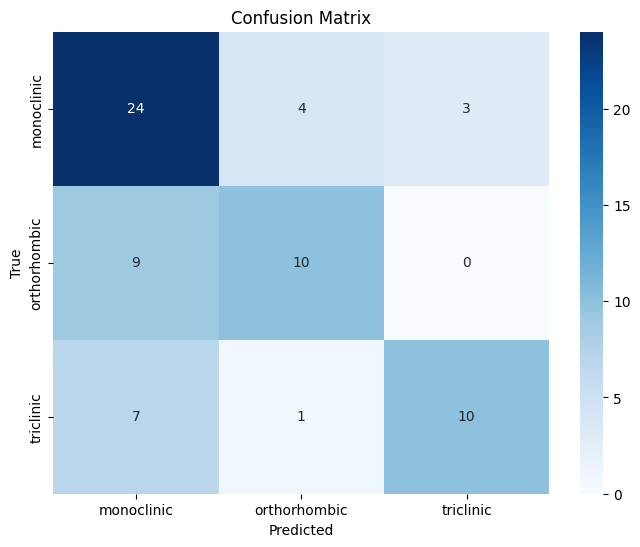

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['monoclinic', 'orthorhombic', 'triclinic'], yticklabels=['monoclinic', 'orthorhombic', 'triclinic'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()
